In [ ]:
# lets colab access drive files and datasets

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
prices_df = pd.read_csv('/content/drive/MyDrive/Applied ML Group 19/Colab Notebooks/prices.csv')
securities_df = pd.read_csv('/content/drive/MyDrive/Applied ML Group 19/Colab Notebooks/securities.csv')
fundamentals_df = pd.read_csv('/content/drive/MyDrive/Applied ML Group 19/Colab Notebooks/fundamentals.csv')

# **Initial Data Exploration**

In [ ]:
prices_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


In [ ]:
securities_df.isnull().sum(axis = 0)

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [ ]:
prices_df.duplicated().sum()

0

In [ ]:
prices_df["symbol"].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [ ]:
securities_df.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [ ]:
securities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [ ]:
securities_df.isnull().sum(axis = 0)

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [ ]:
fundamentals_df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012,5.29,7.328355e+07


In [ ]:
# fund.drop('Unnamed: 0', 1, inplace=True)

In [ ]:
fundamentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [ ]:
fundamentals_df.isnull().sum(axis = 0)

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                          0
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [ ]:
fundamentals_df['Ticker Symbol'].nunique()

448

## Data Preprocessing

In [ ]:
# Convert date column from string to datetime object

prices_df['date'] = pd.to_datetime(prices_df['date'])
fundamentals_df['For Year'] = fundamentals_df['For Year'].apply(lambda x: str(x)[:4])

In [ ]:
fundamentals_df

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,7.507519e+09,5.216201e+10,5.966952e+10,2.210591e+09,0.0,2015,1.20,2.578925e+08
1777,1777,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.0,2013,1.01,4.990099e+08
1778,1778,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.0,2014,1.16,5.025862e+08
1779,1779,ZTS,2015-12-31,1.313000e+09,-58000000.0,-8.100000e+07,32.0,-2.240000e+08,1.012000e+09,65.0,...,3.830000e+09,1.781000e+09,1.068000e+09,6.845000e+09,7.913000e+09,4.765000e+09,-203000000.0,2015,0.68,4.985294e+08


In [ ]:
# companies present in both datasets
prices_companies = set(prices_df['symbol'].unique())
fundamental_companies = set(fundamentals_df['Ticker Symbol'].unique())
common_stocks = pd.DataFrame({'Ticker symbol': list(fundamental_companies.intersection(prices_companies))})
common_stocks['Ticker symbol'].astype(str)
securities_df['Ticker symbol'].astype(str)
common_stocks.merge(securities_df, on='Ticker symbol', how='left')

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MAS,Masco Corp.,reports,Industrials,Building Products,"Taylor, Michigan",1981-06-30,62996
1,EXR,Extra Space Storage,reports,Real Estate,Specialized REITs,"Salt Lake City, UT",2016-01-19,1289490
2,HBAN,Huntington Bancshares,reports,Financials,Banks,"Columbus, Ohio",NaN,49196
3,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
4,QRVO,Qorvo,reports,Information Technology,Semiconductors,"Greensboro, North Carolina",2015-06-11,1604778
...,...,...,...,...,...,...,...,...
442,REGN,Regeneron,reports,Health Care,Biotechnology,"Tarrytown, New York",2013-05-01,872589
443,AAPL,Apple Inc.,reports,Information Technology,Computer Hardware,"Cupertino, California",1982-11-30,320193
444,STX,Seagate Technology,reports,Information Technology,Computer Storage & Peripherals,"Dublin, Ireland",2012-07-02,1137789
445,NOV,National Oilwell Varco Inc.,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",NaN,1021860


In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scale_prices_for_company(stock):
  scaled_prices_df = prices_df.copy(deep=True)
  scaled_prices_df = scaled_prices_df[scaled_prices_df['symbol'] == stock]
  scaled_prices_df.head()
  min_max_scaler = MinMaxScaler()
  scaled_prices_df['open'] = min_max_scaler.fit_transform(scaled_prices_df.open.values.reshape(-1,1))
  scaled_prices_df['high'] = min_max_scaler.fit_transform(scaled_prices_df.high.values.reshape(-1,1))
  scaled_prices_df['low'] = min_max_scaler.fit_transform(scaled_prices_df.low.values.reshape(-1,1))
  scaled_prices_df['close'] = min_max_scaler.fit_transform(scaled_prices_df['close'].values.reshape(-1,1))
  scaled_prices_df.head()
  return scaled_prices_df

In [ ]:
temp_prices_df = prices_df.copy(deep=True)
temp_prices_df = temp_prices_df[temp_prices_df['symbol'] == 'PFE']
temp_prices_df.head()

,date,symbol,open,close,low,high,volume
583,2010-01-04,PFE,18.270000,18.930000,18.240000,18.940001,52086000.0
1051,2010-01-05,PFE,18.920000,18.660000,18.549999,18.930000,43372800.0
1519,2010-01-06,PFE,18.660000,18.600000,18.510000,18.809999,41405100.0
1987,2010-01-07,PFE,18.639999,18.530001,18.459999,18.670000,39428000.0
2455,2010-01-08,PFE,18.620001,18.680000,18.520000,18.709999,30407700.0


In [ ]:
scaled_pfe_df = scale_prices_for_company('PFE')

In [ ]:
scaled_pfe_df.head()

,date,symbol,open,close,low,high,volume
583,2010-01-04,PFE,0.177632,0.206733,0.184508,0.199913,52086000.0
1051,2010-01-05,PFE,0.206140,0.195080,0.197998,0.199480,43372800.0
1519,2010-01-06,PFE,0.194737,0.192490,0.196258,0.194276,41405100.0
1987,2010-01-07,PFE,0.193860,0.189469,0.194082,0.188205,39428000.0
2455,2010-01-08,PFE,0.192982,0.195943,0.196693,0.189939,30407700.0


# **Data Visualizations**
5 selected stocks to perform visualizations on:


*   Pfizer (PFE)
*   Exxon Mobil (XOM)
*   Wells Fargo (WFC)
*   Microsoft (MSFT)
*   McDonald's (MCD)




In [ ]:
stocks = ['PFE', 'XOM', 'WFC', 'MSFT', 'MCD']

In [ ]:
# Top 5 stocks by avg close price

top5 = prices_df.groupby('symbol').mean()['close'].reset_index().sort_values(by='close', ascending=False)[:5]
top5

,symbol,close
353,PCLN,863.456878
202,GOOGL,675.583348
201,GOOG,667.732200
52,AZO,469.007747
245,ISRG,461.974904


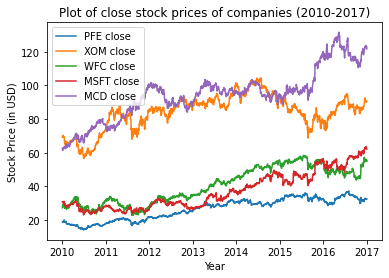

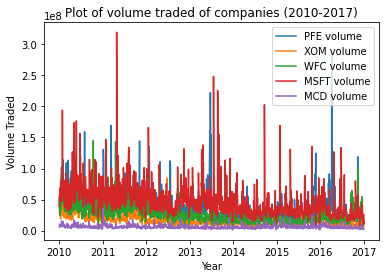

In [ ]:
# Graphs our selected stocks' prices by close price and by volume over time

for stock in list(stocks):
    ind_price_df = prices_df[prices_df['symbol'] == stock]
    plt.plot(ind_price_df['date'], ind_price_df['close'], label=stock + ' close')
    plt.legend(loc='best')
    plt.title('Plot of close stock prices of companies (2010-2017)')
    plt.xlabel('Year')
    plt.ylabel('Stock Price (in USD)')
plt.show()

for stock in list(stocks):
    ind_price_df = prices_df[prices_df['symbol'] == stock]
    plt.plot(ind_price_df['date'], ind_price_df['volume'], label=stock + ' volume')
    plt.legend()
    plt.title('Plot of volume traded of companies (2010-2017)')
    plt.xlabel('Year')
    plt.ylabel('Volume Traded')
plt.show()

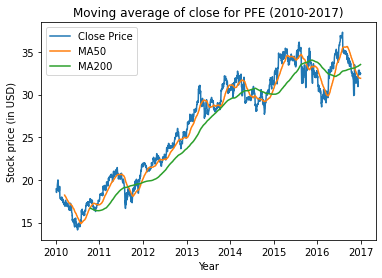

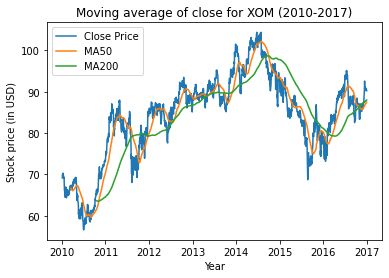

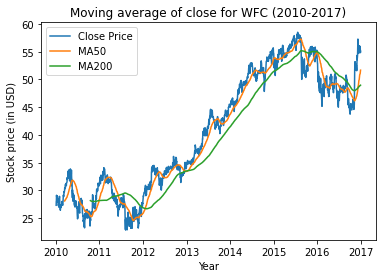

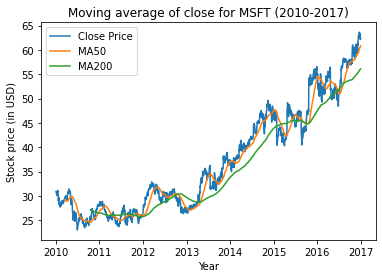

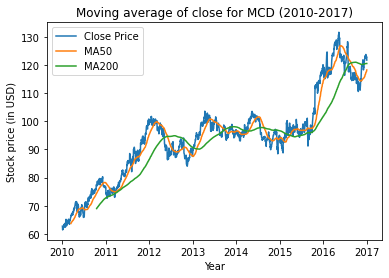

In [ ]:
# Moving average (MA) graphs for our stocks (50 day MA, 200 day MA)

for stock in stocks:
  stock_price_df = pd.DataFrame(prices_df[prices_df['symbol'] == stock])
  stock_price_df['MA50'] = stock_price_df['close'].rolling(50).mean()
  stock_price_df['MA200'] = stock_price_df['close'].rolling(200).mean()

  plt.plot(stock_price_df['date'], stock_price_df['close'], label='Close Price')
  plt.plot(stock_price_df['date'], stock_price_df['MA50'], label='MA50')
  plt.plot(stock_price_df['date'], stock_price_df['MA200'], label='MA200')
  plt.title('Moving average of close for ' + stock + ' (2010-2017)')
  plt.xlabel('Year')
  plt.ylabel('Stock price (in USD)')
  plt.legend()
  plt.show()


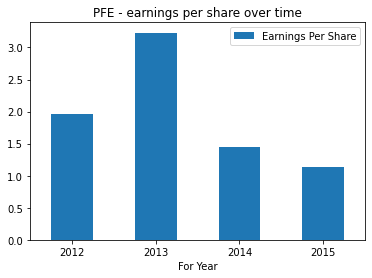

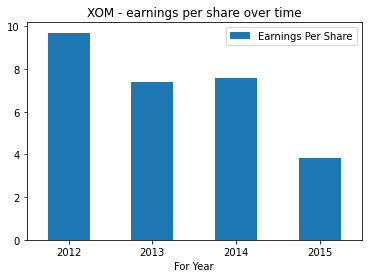

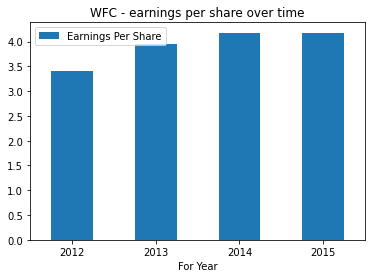

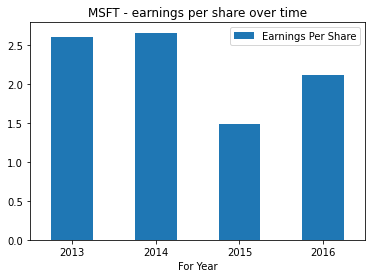

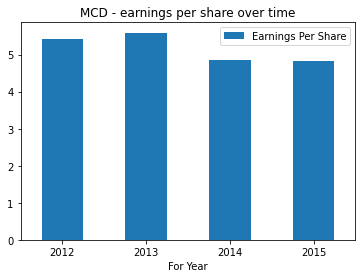

In [ ]:
# Earnings per share over time for stocks

for stock in stocks:
  stock_fundamentals = fundamentals_df[fundamentals_df['Ticker Symbol'] == stock]
  # TODO: 
  stock_fundamentals.plot.bar('For Year', 'Earnings Per Share', title=f'{stock} - earnings per share over time')
  plt.xticks(rotation = 0)

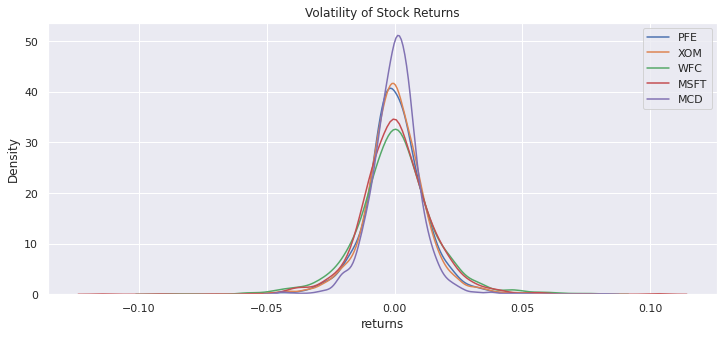

In [ ]:
# volatility plot

sns.set(rc={'figure.figsize':(12,5)})

for stock in stocks:
  returns_df = pd.DataFrame(prices_df[prices_df['symbol'] == stock])
  returns_df['returns'] = (returns_df['close']/returns_df['close'].shift(1)) - 1
  sns.kdeplot(returns_df['returns'],label = stock)
  plt.title('Volatility of Stock Returns')
  plt.legend()

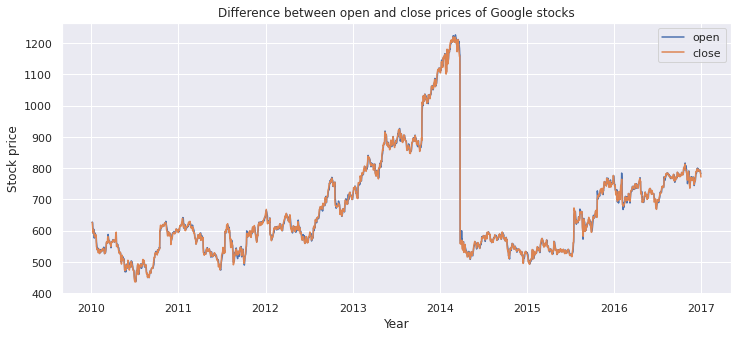

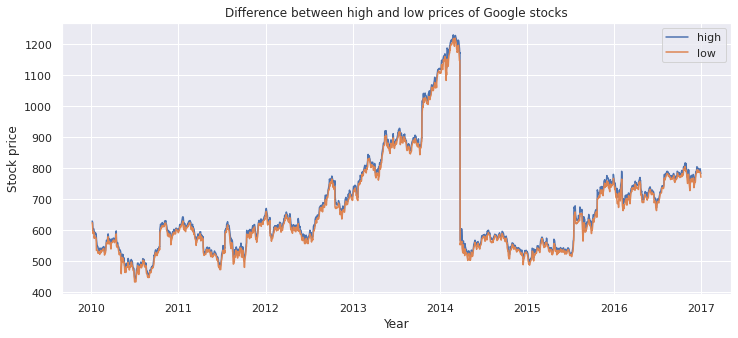

In [ ]:
google_price_df = pd.DataFrame(prices_df[prices_df['symbol'] == 'GOOG'])

plt.plot(google_price_df['date'], google_price_df["open"], label="open")
plt.plot(google_price_df['date'], google_price_df["close"], label="close")
plt.title("Difference between open and close prices of Google stocks")
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.legend()
plt.show()

plt.plot(google_price_df['date'], google_price_df["high"], label="high")
plt.plot(google_price_df['date'], google_price_df["low"], label="low")
plt.title("Difference between high and low prices of Google stocks")
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.legend()
plt.show()

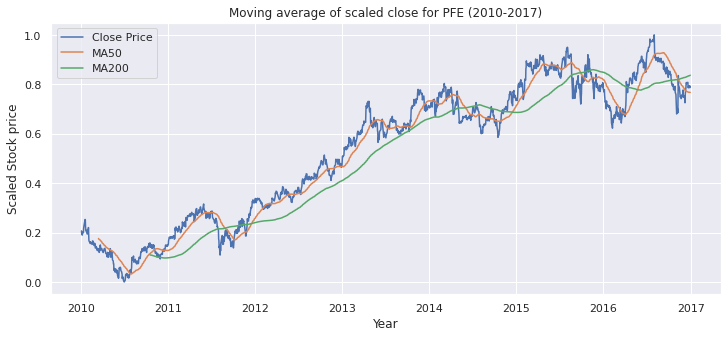

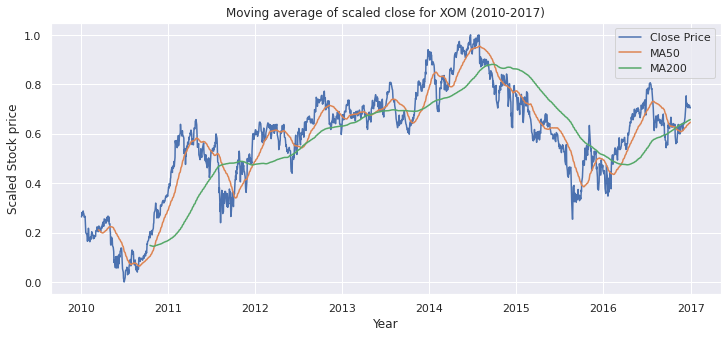

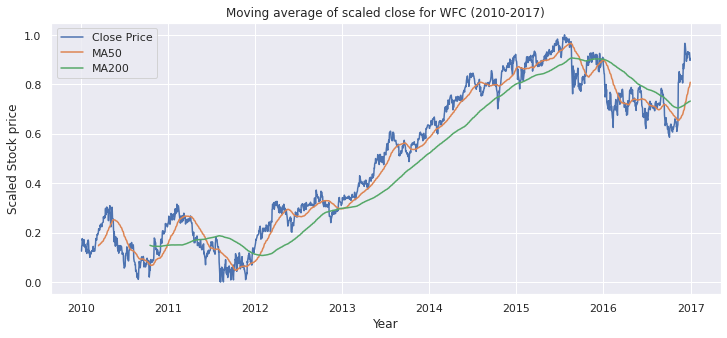

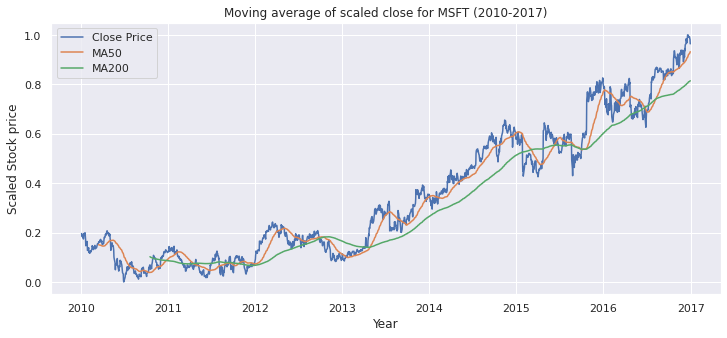

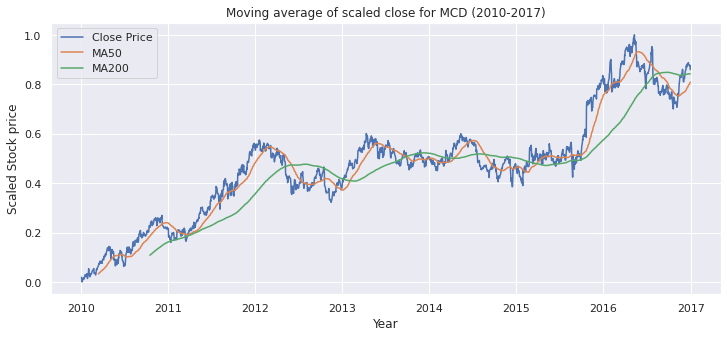

In [ ]:
# Moving average (MA) graphs for our stocks (50 day MA, 200 day MA)
# Plotting with normalized stock prices to compare
for stock in stocks:
  scaled_prices_df = scale_prices_for_company(stock)
  scaled_prices_df['MA50'] = scaled_prices_df['close'].rolling(50).mean()
  scaled_prices_df['MA200'] = scaled_prices_df['close'].rolling(200).mean()

  plt.plot(scaled_prices_df['date'], scaled_prices_df['close'], label='Close Price')
  plt.plot(scaled_prices_df['date'], scaled_prices_df['MA50'], label='MA50')
  plt.plot(scaled_prices_df['date'], scaled_prices_df['MA200'], label='MA200')
  plt.title('Moving average of scaled close for ' + stock + ' (2010-2017)')
  plt.xlabel('Year')
  plt.ylabel('Scaled Stock price')
  plt.legend()
  plt.show()


# **Development/Test Split**
Since data is time series, we can use prices from 2010-2015 as train, 2015-2016 as val, and 2016-2017 as test.


In [ ]:
'''
  Divides price data into 3 dictionaries for original train/val/test prices.
  Another 3 dictionaries with the scaled train/val/test prices.
  Another dictionary with the scaler used for each stock to inverse transform prices and obtain original prices

  prices_dict = {
    'PFE': [price1, price2, price3, ...] 
    'XOM': [price1, price2, price3, ...] 
    ...
  }

'''

train_prices_dict = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}
val_prices_dict = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}
test_prices_dict = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}

train_prices_scaled_dict = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}
val_prices_scaled_dict = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}
test_prices_scaled_dict = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}
scalers = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}

for stock in stocks:
  scaler = MinMaxScaler()

  train_prices_dict[stock] = prices_df[(prices_df['symbol'] == stock) & (prices_df['date'] < '2015-01-01')][['date', 'symbol', 'close']]['close'].to_numpy()
  train_prices_scaled_dict[stock] = scaler.fit_transform(train_prices_dict[stock].reshape(-1, 1)).flatten()
  
  val_prices_dict[stock] = prices_df[(prices_df['symbol'] == stock) & (prices_df['date'] >= '2015-01-01') & (prices_df['date'] < '2016-01-01')][['date', 'symbol', 'close']]['close'].to_numpy()
  val_prices_scaled_dict[stock] = scaler.transform(val_prices_dict[stock].reshape(-1, 1)).flatten()

  test_prices_dict[stock] = prices_df[(prices_df['symbol'] == stock) & (prices_df['date'] >= '2016-01-01')][['date', 'symbol', 'close']]['close'].to_numpy()
  test_prices_scaled_dict[stock] = scaler.transform(test_prices_dict[stock].reshape(-1, 1)).flatten()

  scalers[stock] = scaler



In [ ]:
def dev_test_split(stock):
  '''
    Set up X and Y train/val/test, using 60 previous days (X) to predict the next day (Y)
    Returns: (x_train, y_train, x_val, y_val, x_test, y_test)
  '''

  x_train = []
  y_train = []

  x_val = []
  y_val = []

  x_test = []
  y_test = []

  for i in range(60, len(train_prices_scaled_dict[stock])):
    x_train.append(train_prices_scaled_dict[stock][i-60:i])
    y_train.append(train_prices_scaled_dict[stock][i])

  for i in range(60, len(val_prices_scaled_dict[stock])):
    x_val.append(val_prices_scaled_dict[stock][i-60:i])
    y_val.append(val_prices_scaled_dict[stock][i])

  for i in range(60, len(test_prices_scaled_dict[stock])):
    x_test.append(test_prices_scaled_dict[stock][i-60:i])
    y_test.append(test_prices_scaled_dict[stock][i])

  x_train = np.array(x_train)
  y_train = np.array(y_train).reshape(len(y_train), 1)

  x_val = np.array(x_val)
  y_val = np.array(y_val).reshape(len(y_val), 1)

  x_test = np.array(x_test)
  y_test = np.array(y_test).reshape(len(y_test), 1)

  return (x_train, y_train, x_val, y_val, x_test, y_test)


### **Function to Plot Predictions**

In [ ]:
def plot_predictions(stock, predictions):
  '''
    Plots predicted prices and compare with actual predictions
  
    Inputs: 
      - stock name (string)
      - predictions (numpy array of shape (n,1))

  '''

  predicted_prices = pd.DataFrame({'predicted_close':scalers[stock].inverse_transform(predictions).flatten()})
  actual_prices = prices_df[(prices_df['symbol'] == stock) & (prices_df['date'] >= '2016-01-01')][['date','close']]
  predicted_prices['date'] = list(actual_prices['date'])[60:]

  plt.plot(actual_prices['date'], actual_prices['close'], label='Actual Prices')
  plt.plot(predicted_prices['date'], predicted_prices['predicted_close'], label='Predicted Prices')
  plt.legend()
  plt.title(f'Actual v/s Predicted for {stock}')
  plt.ylabel('Price in USD')
  plt.xlabel('Date')
  plt.show()

# **Modeling**
**1. LSTM**

In [ ]:
def train_lstm(x_train, y_train, x_val, y_val, x_test, y_test, stock_name):
  '''
    Trains and returns predictions from LSTM model
  '''

  lstm_model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(60,1)),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(25),
    layers.Dense(1)
  ])

  #lstm_model.summary()
  
  lstm_model.compile('adam', 'mean_squared_error', metrics=['mse'])
  cb = lstm_model.fit(x_train, y_train, batch_size=50, epochs=20, verbose=1, validation_data=(x_val,y_val))

  hist = pd.DataFrame(cb.history)
  plt.plot(hist.index, hist["mse"], label="Train")
  plt.plot(hist.index, hist["val_mse"], label="Val")
  plt.title("MSE Over Epochs: " + stock_name)
  plt.legend()
  plt.show()

  results = lstm_model.evaluate(x_test, y_test, verbose=0)
  print('Test Loss/MSE:', results[0])

  return lstm_model.predict(x_test)

Predicting stock: PFE
Epoch 1/20
24/24 [==============================] - 8s 45ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 3/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/20
24/24 [==============================] - 0s 12ms/step - loss: 9.5262e-04 - mse: 9.5262e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 5/20
24/24 [==============================] - 0s 12ms/step - loss: 9.3771e-04 - mse: 9.3771e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/20
24/24 [==============================] - 0s 12ms/step - loss: 9.4641e-04 - mse: 9.4641e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/20
24/24 [==============================] - 0s 12ms/step - loss: 9.5112e-04 - mse: 9.5112e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 8/20
24/24 [===========

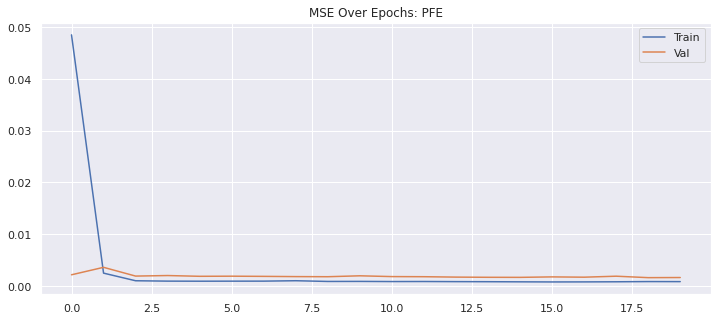

Test Loss/MSE: 0.0014491317560896277
6/6 [==============================] - 1s 5ms/step
Predicting stock: XOM
Epoch 1/20
24/24 [==============================] - 4s 44ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 5/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 6/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0016 - mse: 0.0016 - val_loss

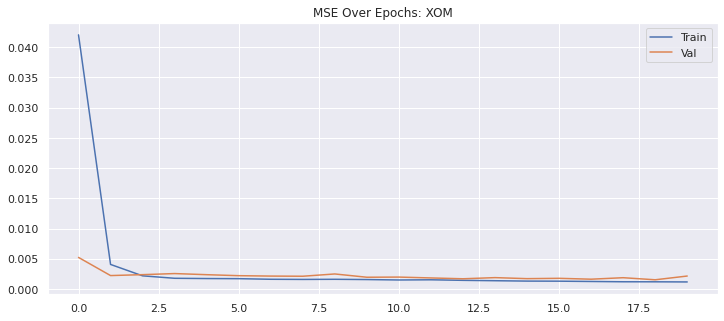

Test Loss/MSE: 0.0013689693296328187
6/6 [==============================] - 1s 5ms/step
Predicting stock: WFC
Epoch 1/20
24/24 [==============================] - 4s 57ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/20
24/24 [==============================] - 0s 11ms/step - loss: 8.7695e-04 - mse: 8.7695e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/20
24/24 [==============================] - 0s 11ms/step - loss: 8.6092e-04 - mse: 8.6092e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/20
24/24 [==============================] - 0s 11ms/step - loss: 8.5379e-04 - mse: 8.5379e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 7/20
24/24 [==============================] - 0s 12ms/step - loss: 8.4541e

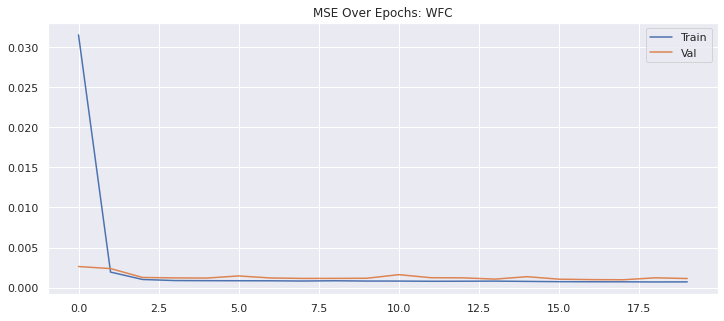

Test Loss/MSE: 0.0020124379079788923
6/6 [==============================] - 1s 5ms/step
Predicting stock: MSFT
Epoch 1/20
24/24 [==============================] - 4s 44ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 2/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0011 - mse: 0.0011 - val_los

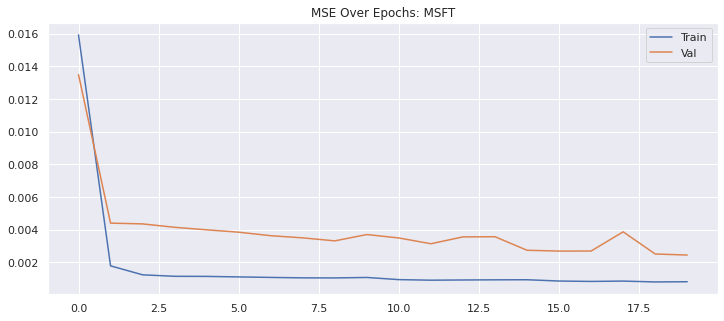

Test Loss/MSE: 0.0016235181828960776
6/6 [==============================] - 1s 5ms/step
Predicting stock: MCD
Epoch 1/20
24/24 [==============================] - 4s 43ms/step - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 2/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 3/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 4/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 5/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 6/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 7/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0014 - mse: 0.0014 - val_loss

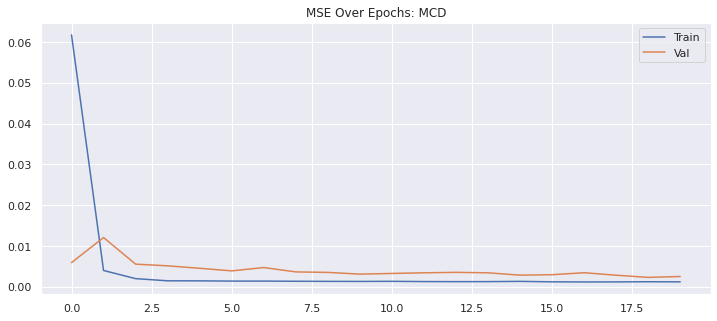

Test Loss/MSE: 0.0041475058533251286
6/6 [==============================] - 1s 6ms/step


In [ ]:
# Using functions above to predict 2016 prices for all the stocks

stock_predictions = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}
stock_predictions_rescaled = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}

for stock in stocks:
  print('Predicting stock:', stock)
  x_train, y_train, x_val, y_val, x_test, y_test = dev_test_split(stock)
  predictions = train_lstm(x_train, y_train, x_val, y_val, x_test, y_test, stock)
  stock_predictions[stock] = predictions
  stock_predictions_rescaled[stock] = scalers[stock].inverse_transform(predictions).flatten()

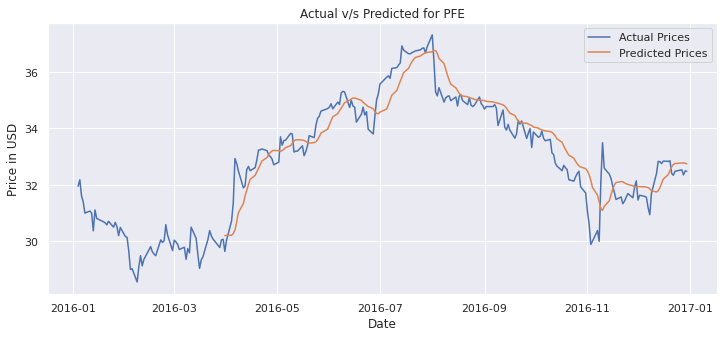

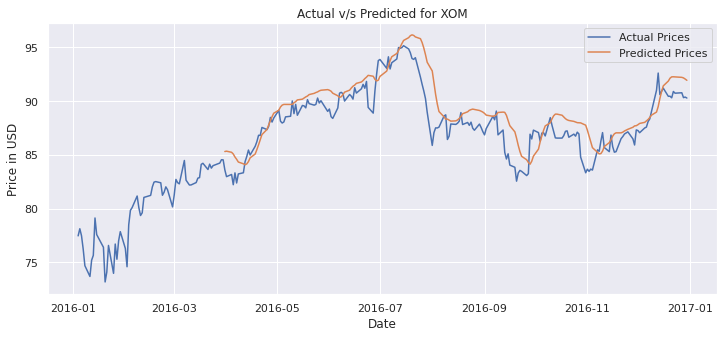

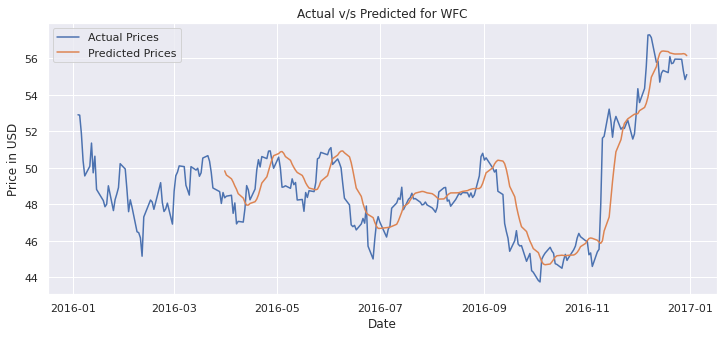

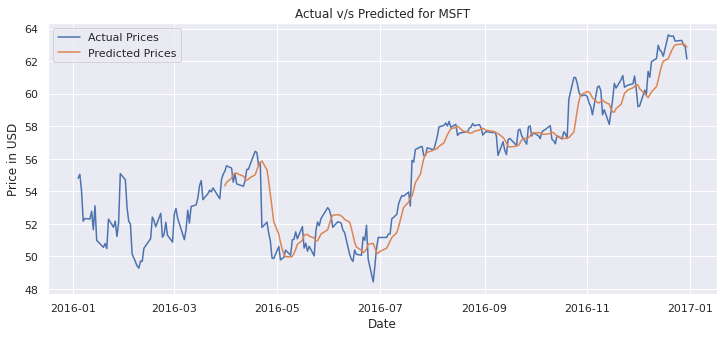

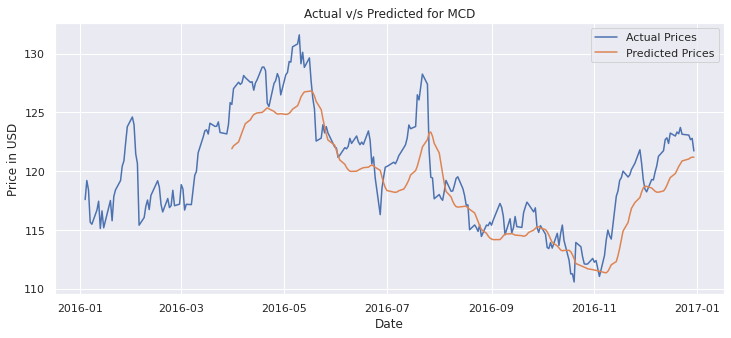

In [ ]:
for stock in stocks:
  plot_predictions(stock, stock_predictions[stock])

In [ ]:
for stock in stocks:
  print('Test RMSE for ' + stock + ':', end=' ')
  print((np.sum((stock_predictions_rescaled[stock] - test_prices_dict[stock][60:])**2)/len(stock_predictions_rescaled[stock]))**0.5)

print()
for stock in stocks:
  print('Test MAE for ' + stock + ':', end=' ')
  print(np.sum(np.abs(stock_predictions_rescaled[stock] - test_prices_dict[stock][60:]))/len(stock_predictions_rescaled[stock]))



Test RMSE for PFE: 0.7084354191939269
Test RMSE for XOM: 1.7689508721228375
Test RMSE for WFC: 1.4727606340769281
Test RMSE for MSFT: 1.0717909245039268
Test RMSE for MCD: 2.7138645025525436

Test MAE for PFE: 0.5559073366718293
Test MAE for XOM: 1.3633265620473225
Test MAE for WFC: 1.0847591444702145
Test MAE for MSFT: 0.8005401102841695
Test MAE for MCD: 2.2316308883107503


Rolling Linear Regression

In [ ]:
stocks

['PFE', 'XOM', 'WFC', 'MSFT', 'MCD']

We should check if the plots of these stocks seem linear.

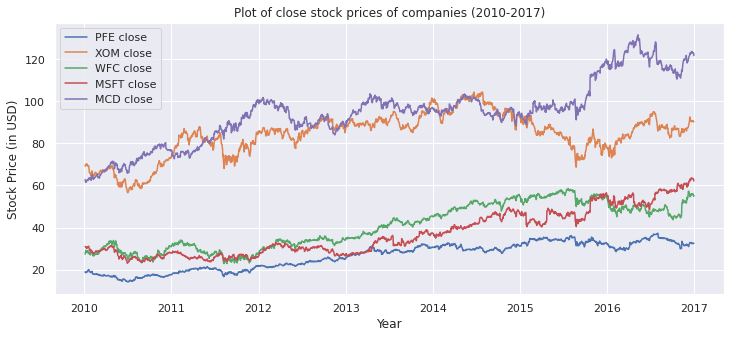

In [ ]:
for stock in list(stocks):
    ind_price_df = prices_df[prices_df['symbol'] == stock]
    plt.plot(ind_price_df['date'], ind_price_df['close'], label=stock + ' close')
    plt.legend(loc='best')
    plt.title('Plot of close stock prices of companies (2010-2017)')
    plt.xlabel('Year')
    plt.ylabel('Stock Price (in USD)')
plt.show()

First with straightforward linear regression, and minimizing the R-square:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
def train_basic_rlr_model(X_dev, y_dev, X_test, y_test):
  lr_model = LinearRegression()
  lr_model.fit(X_dev, y_dev)

  score = lr_model.score(X_test, y_test)
  predictions = lr_model.predict(X_test)

  mae = mean_absolute_error(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)

  return score, predictions, mae, mse

In [ ]:
rlr_predictions = []
rlr_scores = []
rlr_mae_scores = []
rlr_mse_scores = []
for stock in stocks:
  X_train, y_train, X_val, y_val, X_test, y_test = dev_test_split(stock)
  score, predictions, mae, mse = train_basic_rlr_model(X_train, y_train, X_test, y_test)
  rlr_scores.append(score)
  rlr_mae_scores.append(mae)
  rlr_mse_scores.append(mse)
  rlr_predictions.append(predictions)

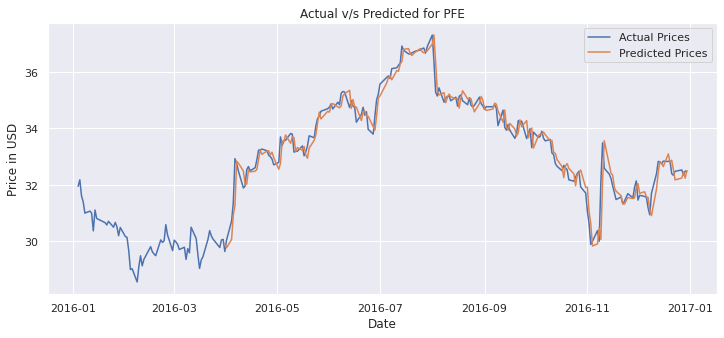

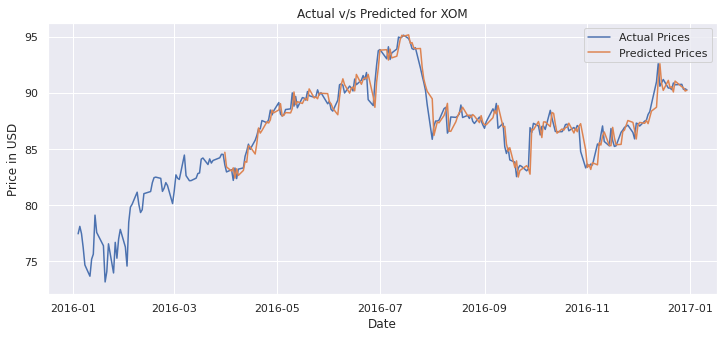

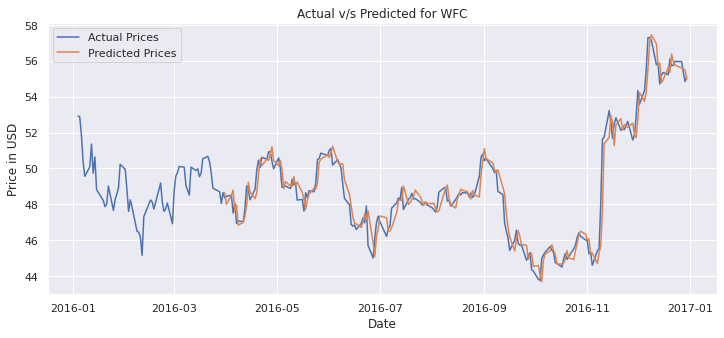

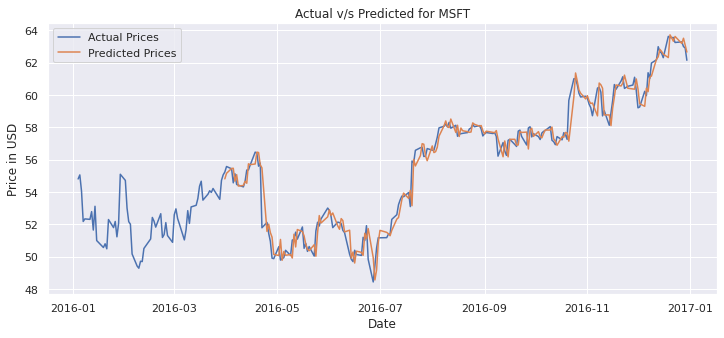

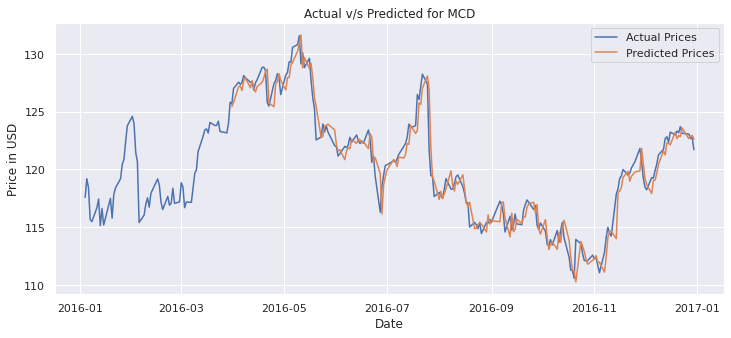

In [ ]:
for index, stock in enumerate(stocks):
  plot_predictions(stock, rlr_predictions[index])

In [ ]:
for index, stock in enumerate(stocks):
  print(f"Printing the scores for model built for {stock}")
  print(f"  R square score on model is {rlr_scores[index]}")
  print(f"  Mean absolute error on model is {rlr_mae_scores[index]}")
  print(f"  Mean squared error on model is {rlr_mse_scores[index]}")

Printing the scores for model built for PFE
  R square score on model is 0.943589785297735
  Mean absolute error on model is 0.014635626423987065
  Mean squared error on model is 0.00043466651117962874
Printing the scores for model built for XOM
  R square score on model is 0.9040386737349793
  Mean absolute error on model is 0.013560094996640222
  Mean squared error on model is 0.00035474425469587175
Printing the scores for model built for WFC
  R square score on model is 0.9468888768049339
  Mean absolute error on model is 0.015743031321227317
  Mean squared error on model is 0.00047003155628300744
Printing the scores for model built for MSFT
  R square score on model is 0.9668508008825827
  Mean absolute error on model is 0.018676035545592645
  Mean squared error on model is 0.0007080497013979152
Printing the scores for model built for MCD
  R square score on model is 0.9507751817745642
  Mean absolute error on model is 0.019904750792870463
  Mean squared error on model is 0.0007339

Thoughts: There seems to be overfitting.

Next, let's try with Ridge Regression:

In [ ]:
def grid_search(X_dev, y_dev, X_val, y_val):
    alphas = np.logspace(-5, 1, 20)
    solvers = ['svd', 'cholesky']
    best_alpha = -1
    best_solver = ""
    max_score = -1
    for alpha in alphas:
        for solver in solvers:
            rr_model = Ridge(alpha=alpha, solver=solver)
            rr_model.fit(X_dev, y_dev)

            score = rr_model.score(X_dev, y_dev)
            if score > max_score:
                max_score = score
                best_alpha = alpha
                best_solver = solver
    return best_alpha, best_solver

In [ ]:
from sklearn.linear_model import Ridge

def train_ridge_model_with_tuning(X_dev, y_dev, X_val, y_val, X_test, y_test):
    best_alpha, best_solver = grid_search(X_dev, y_dev, X_val, y_val)
    print(f"Printing best alpha {best_alpha}")
    print(f"Printing best solver {best_solver}")
    rr_model = Ridge(alpha=best_alpha, solver=best_solver)
    rr_model.fit(X_dev, y_dev)

    score = rr_model.score(X_test, y_test)
    predictions = rr_model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return score, predictions, mae, mse

In [ ]:
rrr_predictions = []
rrr_scores = []
rrr_mae_scores = []
rrr_mse_scores = []
for stock in stocks:
  print(f"For stock {stock}")
  X_train, y_train, X_val, y_val, X_test, y_test = dev_test_split(stock)
  score, predictions, mae, mse = train_ridge_model_with_tuning(X_train, y_train, X_val, y_val, X_test, y_test)
  rrr_scores.append(score)
  rrr_mae_scores.append(mae)
  rrr_mse_scores.append(mse)
  rrr_predictions.append(predictions)

For stock PFE
Printing best alpha 1e-05
Printing best solver svd
For stock XOM
Printing best alpha 1e-05
Printing best solver svd
For stock WFC
Printing best alpha 1e-05
Printing best solver svd
For stock MSFT
Printing best alpha 1e-05
Printing best solver svd
For stock MCD
Printing best alpha 1e-05
Printing best solver svd


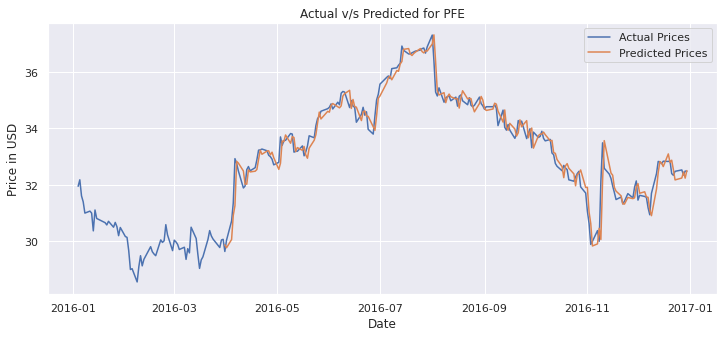

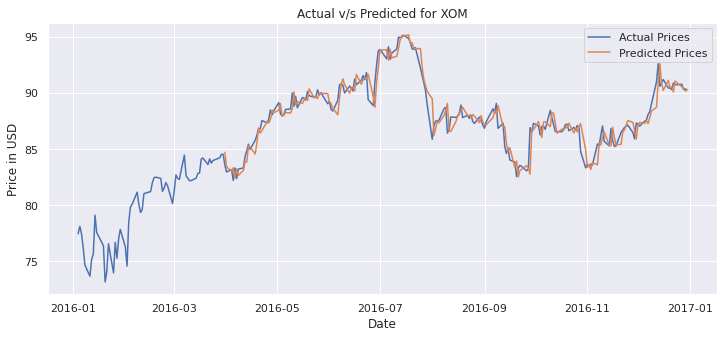

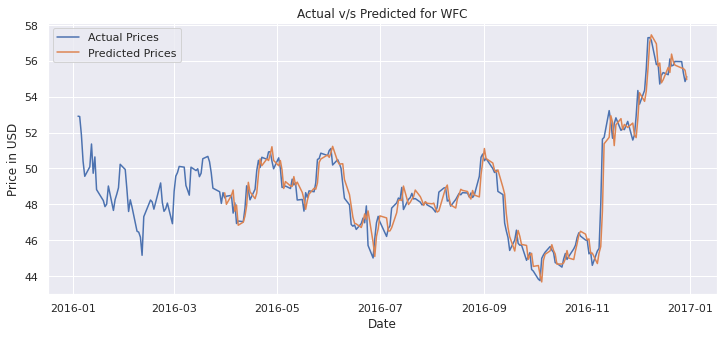

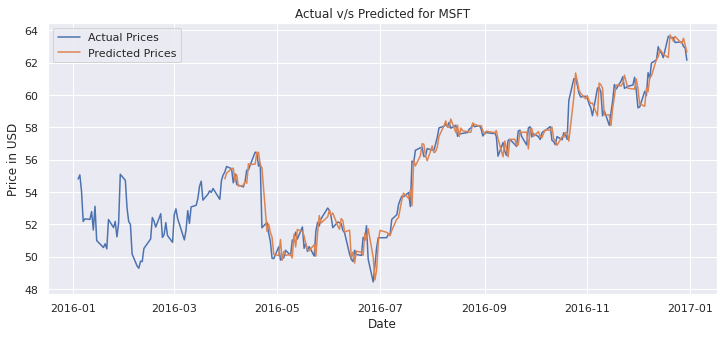

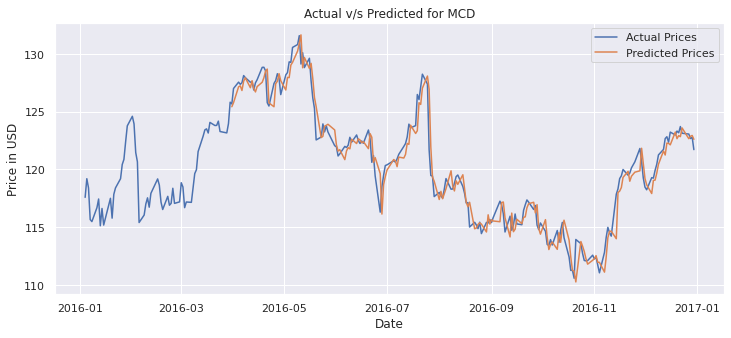

In [ ]:
for index, stock in enumerate(stocks):
  plot_predictions(stock, rrr_predictions[index])

In [ ]:
for index, stock in enumerate(stocks):
  print(f"Printing the scores for model built for {stock}")
  print(f"  R square score on model is {rrr_scores[index]}")
  print(f"  Mean absolute error on model is {rrr_mae_scores[index]}")
  print(f"  Mean squared error on model is {rrr_mse_scores[index]}")

Printing the scores for model built for PFE
  R square score on model is 0.94358940413061
  Mean absolute error on model is 0.014635655941520208
  Mean squared error on model is 0.0004346694482467053
Printing the scores for model built for XOM
  R square score on model is 0.9040393358591475
  Mean absolute error on model is 0.013560010554591552
  Mean squared error on model is 0.0003547418069937223
Printing the scores for model built for WFC
  R square score on model is 0.9468884783167263
  Mean absolute error on model is 0.015743036270488706
  Mean squared error on model is 0.0004700350828895099
Printing the scores for model built for MSFT
  R square score on model is 0.9668513856025086
  Mean absolute error on model is 0.018675744111847217
  Mean squared error on model is 0.0007080372120835437
Printing the scores for model built for MCD
  R square score on model is 0.950775346700016
  Mean absolute error on model is 0.01990472894950626
  Mean squared error on model is 0.0007339698710

It seems even while we try to tune alpha in Ridge, the value prefers to be lower (even when altering the range) which is essentially the same as a regular Linear Regression model.

**3. ARIMA - Auto Regressive Integrated Moving Average**

The ARIMA model has 3 parameters (p, d, q):

**p:** Order of the autoregressive model(Number of time lags)

**d:** Degree of differencing(Number of times the data had past values subtracted)

**q:** Order of moving average model

Before training the model, we need to ensure that the time series is stationary

The augmented Dickey-Fuller test (ADF test) is a common statistical test used to test whether a given Time series is stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    
    # Dickey-Fuller test
    print('\nDickey-Fuller test results\n')
    df = adfuller(series, regresults=False)
    test_result = pd.Series(df[0:4], index=['Test Statistic','p-value','# of lags','# of obs'])
    print(test_result)
    for k,v in df[4].items():
        print('Critical value at %s: %1.5f' %(k,v))
    print('-------------------------------------------')

In [ ]:
check_stationarity(train_prices_dict['PFE'])


Dickey-Fuller test results

Test Statistic      -0.546341
p-value              0.882652
# of lags            1.000000
# of obs          1256.000000
dtype: float64
Critical value at 1%: -3.43557
Critical value at 5%: -2.86384
Critical value at 10%: -2.56800
-------------------------------------------


As Test statistic is greater than all critical values, the time series is clearly not stationary. Testing different transformations for stationarity is required before applying ARIMA model to time series.

In [ ]:
train_prices_diff_dict = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}

# Simple differencing transformation of original time series (we take the value at time (t) and subtract the value at time (t-1) to get the difference.)
for stock in stocks:
  series = pd.Series(train_prices_dict[stock])
  series_diff = series - series.shift()
  series_diff.dropna(inplace=True)
  train_prices_diff_dict[stock] = series_diff

  print(stock)
  check_stationarity(train_prices_diff_dict[stock])

PFE

Dickey-Fuller test results

Test Statistic     -36.941589
p-value              0.000000
# of lags            0.000000
# of obs          1256.000000
dtype: float64
Critical value at 1%: -3.43557
Critical value at 5%: -2.86384
Critical value at 10%: -2.56800
-------------------------------------------
XOM

Dickey-Fuller test results

Test Statistic   -1.713895e+01
p-value           7.066370e-30
# of lags         4.000000e+00
# of obs          1.252000e+03
dtype: float64
Critical value at 1%: -3.43558
Critical value at 5%: -2.86385
Critical value at 10%: -2.56800
-------------------------------------------
WFC

Dickey-Fuller test results

Test Statistic   -1.775726e+01
p-value           3.350241e-30
# of lags         4.000000e+00
# of obs          1.252000e+03
dtype: float64
Critical value at 1%: -3.43558
Critical value at 5%: -2.86385
Critical value at 10%: -2.56800
-------------------------------------------
MSFT

Dickey-Fuller test results

Test Statistic     -35.043877
p-value   

As simple differencing yields a test statistic much lower than critical values, we will use this for applying ARIMA.

**Hyperparameter Tuning**

The auto_arima function returns a fitted ARIMA model after determining the most optimal parameters for an ARIMA model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=246.948, Time=2.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=253.298, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=253.065, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=253.052, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=252.961, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=257.038, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=257.045, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=249.535, Time=3.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=248.781, Time=3.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=255.055, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=259.043, Time=0.93 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=258.659, Time=1.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=250.353, Time=3.87 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=246.577, Time=1.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=256.8

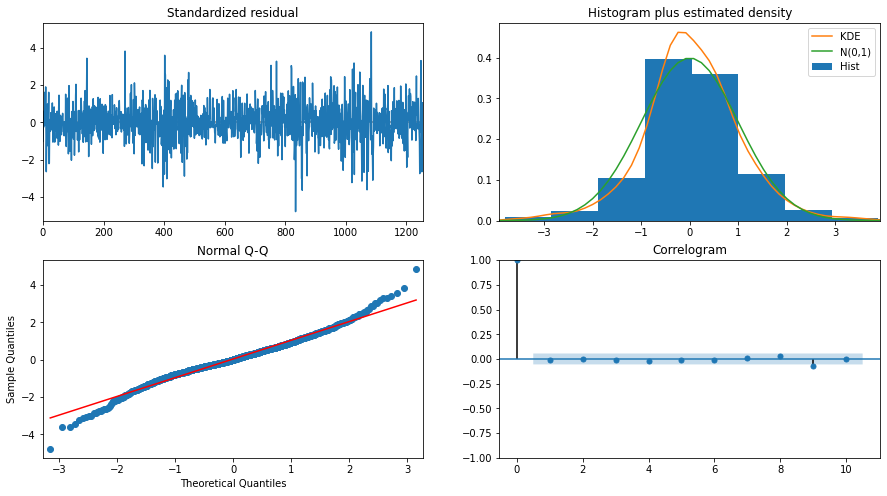

In [ ]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_prices_dict['PFE'],
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
print(model_autoARIMA.get_params(False))
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot.

**As a result, the Auto ARIMA model assigned the values 2, 1, and 2 to, p, d, and q, respectively.**

In [ ]:
# Hyperparameter tuning for all stocks
model_hyperparameters_dict = {'PFE':None, 'XOM':None, 'WFC':None, 'MSFT':None, 'MCD':None}
for stock in stocks:
  model_autoARIMA = auto_arima(train_prices_dict[stock],
                      trace=False,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
  model_hyperparameters_dict[stock] = model_autoARIMA.get_params(False)['order']
print(model_hyperparameters_dict)

{'PFE': (2, 1, 2), 'XOM': (1, 1, 1), 'WFC': (2, 1, 2), 'MSFT': (0, 1, 0), 'MCD': (0, 1, 1)}


**Plot**

In [ ]:
def plot_arima_prediction(model_predictions, stock):

  predicted_prices = pd.DataFrame({'predicted_close':model_predictions})
  actual_prices = prices_df[(prices_df['symbol'] == stock) & (prices_df['date'] >= '2016-01-01')][['date','close']]
  predicted_prices['date'] = list(actual_prices['date'])

  plt.plot(actual_prices['date'], actual_prices['close'], label='Actual Prices')
  plt.plot(predicted_prices['date'], predicted_prices['predicted_close'], label='Predicted Prices')
  plt.legend()
  plt.title(f'Actual v/s Predicted for {stock}')
  plt.ylabel('Price in USD')
  plt.xlabel('Date')
  plt.show()

**Training model and Forecasting**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import math

import warnings
warnings.simplefilter('ignore')

def root_mean_squared_error(y_true, y_pred):
    return math.sqrt(keras.metrics.mean_squared_error(y_true, y_pred))

def train_arima_model(stock):
  history = list(train_prices_dict[stock])
  model_predictions = []

  for i in range(0,len(test_prices_dict[stock]),5):
    forecast_num = 5 if len(test_prices_dict[stock]) - i >= 5 else len(test_prices_dict[stock]) - i
    model = ARIMA(history, order=model_hyperparameters_dict[stock])
    model_fit = model.fit()
    output = model_fit.forecast(forecast_num)
    model_predictions = model_predictions + list(output)
    history = history+list(test_prices_dict[stock][i:i+forecast_num])

  RMSE_error = root_mean_squared_error(test_prices_dict[stock], model_predictions)
  print("\n", stock)
  print('Root Mean Squared Error is {}'.format(RMSE_error))

  model_predictions = np.array(model_predictions).flatten()

  # Calculate MAE
  arima_mae = keras.metrics.mean_absolute_error(test_prices_dict[stock], model_predictions).numpy()
  print("ARIMA Mean Absolute error: ", arima_mae)

  plot_arima_prediction(model_predictions, stock)


 PFE
Root Mean Squared Error is 0.6252258909004016
ARIMA Mean Absolute error:  0.42578677065337206


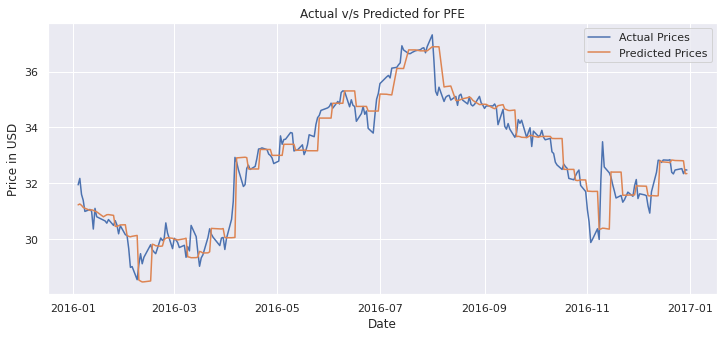


 XOM
Root Mean Squared Error is 2.7158754433159733
ARIMA Mean Absolute error:  1.4231605756031582


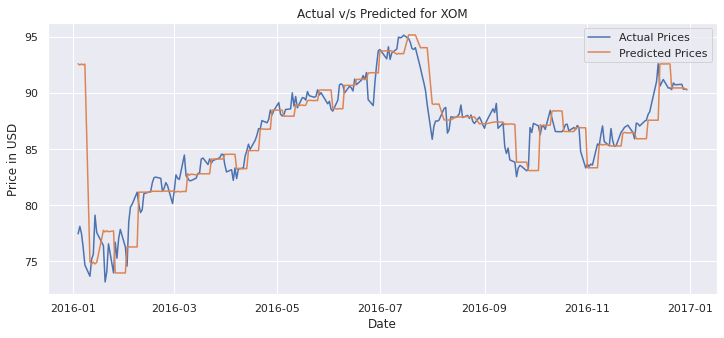


 WFC
Root Mean Squared Error is 1.412312252810065
ARIMA Mean Absolute error:  0.956666177004384


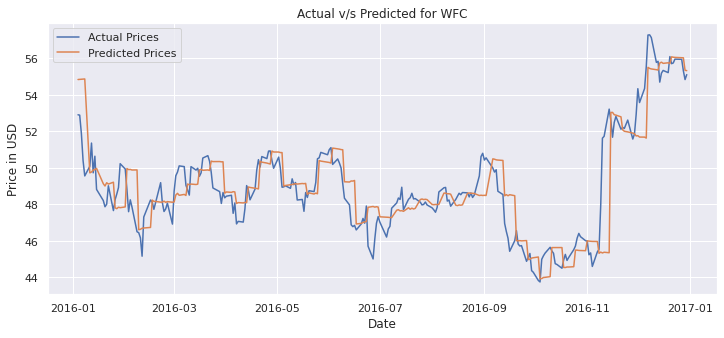


 MSFT
Root Mean Squared Error is 1.6082636894133158
ARIMA Mean Absolute error:  0.983055361111111


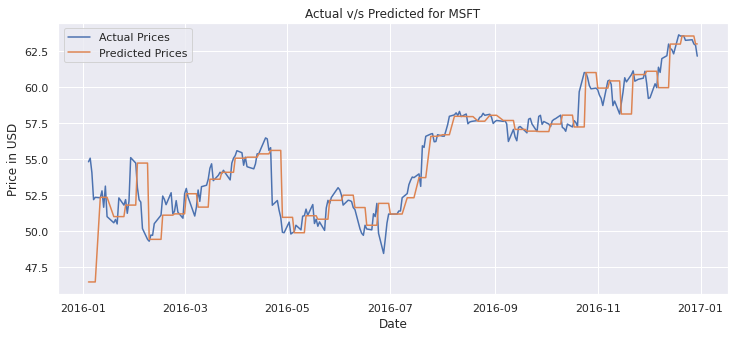


 MCD
Root Mean Squared Error is 3.9563503451428863
ARIMA Mean Absolute error:  1.9213513995891758


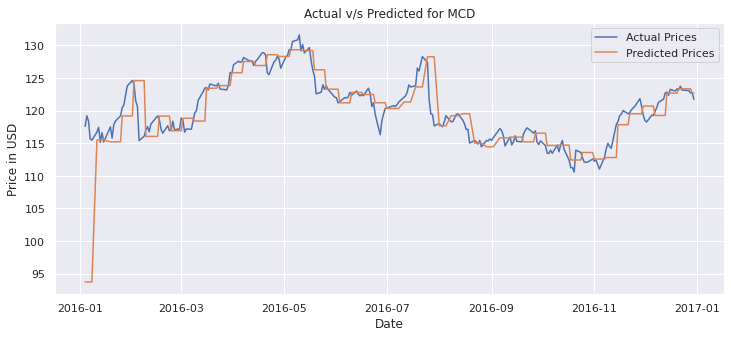

In [ ]:
for stock in stocks:
  train_arima_model(stock)